In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
data=pd.read_csv('ola_data.csv')

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

1. MMMM-YY : Reporting Date (Monthly)

2. Driver_ID : Unique id for drivers

3. Age : Age of the driver

4. Gender : Gender of the driver – Male : 0, Female: 1

5. City : City Code of the driver

6. Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

7. Income : Monthly average Income of the driver

8. Date Of Joining : Joining date for the driver

9. LastWorkingDate : Last date of working for the driver

10. Joining Designation : Designation of the driver at the time of joining

11. Grade : Grade of the driver at the time of reporting

12. Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)

13. Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [79]:
data.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
data.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [6]:
new_df = data.groupby('Driver_ID').agg(
{'MMM-YY':'last',
 'Age':'last',
 'Gender':'last',
 'City':'last',
 'Education_Level':'last',
 'Income':'last',
 'Dateofjoining':'last',
 'LastWorkingDate':'last',
 'Joining Designation':'last',
 'Grade':'last',
 'Total Business Value':'sum',
 'Quarterly Rating':'last'
}
).reset_index()

In [7]:
target_label=[0 if(lwd==None)else 1 for lwd in new_df['LastWorkingDate']]
new_df['target_label'] = target_label

In [8]:
new_df = pd.DataFrame(new_df)

In [9]:
#new_df.to_csv('cleaned_ola_data.csv',index=False)

In [10]:
new_df.rename(columns={'MMM-YY':'Reporting Date'},inplace=True)

In [11]:
new_df.head()

,Driver_ID,Reporting Date,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target_label
0,1,03/01/19,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,1715580,2,1
1,2,12/01/20,31.0,0.0,C7,2,67016,11/06/20,None,2,2,0,1,0
2,4,04/01/20,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,350000,1,1
3,5,03/01/19,29.0,0.0,C9,0,46368,01/09/19,03/07/19,1,1,120360,1,1
4,6,12/01/20,31.0,1.0,C11,1,78728,31/07/20,None,3,3,1265000,2,0


In [12]:
new_df['Reporting Date'] = pd.to_datetime(new_df['Reporting Date'])
new_df['Dateofjoining'] = pd.to_datetime(new_df['Dateofjoining'])
new_df['LastWorkingDate'] = pd.to_datetime(new_df['LastWorkingDate'])

In [13]:
new_df.head()

,Driver_ID,Reporting Date,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target_label
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2,1
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1,1
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1,1
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2,0


In [14]:
new_df['Reporting_Date_year'] = new_df['Reporting Date'].dt.strftime('%Y')
new_df['Reporting_Date_month'] = new_df['Reporting Date'].dt.strftime('%m')

new_df['Last_Working_Date_year'] = new_df['LastWorkingDate'].dt.strftime('%Y')
new_df['Last_Working_Date_month'] = new_df['LastWorkingDate'].dt.strftime('%m')

new_df['Date_of_joining_year'] = new_df['Dateofjoining'].dt.strftime('%Y')
new_df['Date_of_joining_month'] = new_df['LastWorkingDate'].dt.strftime('%m')

In [15]:
new_df.head()

,Driver_ID,Reporting Date,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target_label,Reporting_Date_year,Reporting_Date_month,Last_Working_Date_year,Last_Working_Date_month,Date_of_joining_year,Date_of_joining_month
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2,1,2019,03,2019,03,2018,03
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,2020,12,NaN,NaN,2020,NaN
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1,1,2020,04,2020,04,2019,04
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1,1,2019,03,2019,03,2019,03
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2,0,2020,12,NaN,NaN,2020,NaN


In [16]:
new_df.drop(['Reporting Date','Dateofjoining','LastWorkingDate','City','Driver_ID'],axis=1,inplace=True)

In [17]:
new_df.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,target_label,Reporting_Date_year,Reporting_Date_month,Last_Working_Date_year,Last_Working_Date_month,Date_of_joining_year,Date_of_joining_month
0,28.0,0.0,2,57387,1,1,1715580,2,1,2019,03,2019,03,2018,03
1,31.0,0.0,2,67016,2,2,0,1,0,2020,12,NaN,NaN,2020,NaN
2,43.0,0.0,2,65603,2,2,350000,1,1,2020,04,2020,04,2019,04
3,29.0,0.0,0,46368,1,1,120360,1,1,2019,03,2019,03,2019,03
4,31.0,1.0,1,78728,3,3,1265000,2,0,2020,12,NaN,NaN,2020,NaN


In [18]:
new_df.isna().sum()

Age                          0
Gender                       0
Education_Level              0
Income                       0
Joining Designation          0
Grade                        0
Total Business Value         0
Quarterly Rating             0
target_label                 0
Reporting_Date_year          0
Reporting_Date_month         0
Last_Working_Date_year     765
Last_Working_Date_month    765
Date_of_joining_year         0
Date_of_joining_month      765
dtype: int64

In [19]:
Y = new_df['target_label']
X = new_df.drop('target_label',axis=1)

In [80]:
X.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Reporting_Date_year,Reporting_Date_month,Last_Working_Date_year,Last_Working_Date_month,Date_of_joining_year,Date_of_joining_month
0,28,0,2,57387,1,1,1715580,2,2019,3,2019,3,2018,3
1,31,0,2,67016,2,2,0,1,2020,12,2019,7,2020,7
2,43,0,2,65603,2,2,350000,1,2020,4,2020,4,2019,4
3,29,0,0,46368,1,1,120360,1,2019,3,2019,3,2019,3
4,31,1,1,78728,3,3,1265000,2,2020,12,2019,4,2020,4


In [21]:
cols=X.columns
cols

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating',
       'Reporting_Date_year', 'Reporting_Date_month', 'Last_Working_Date_year',
       'Last_Working_Date_month', 'Date_of_joining_year',
       'Date_of_joining_month'],
      dtype='object')

# Handling Missing value

In [22]:
from sklearn.impute import KNNImputer

In [23]:
new_df['Last_Working_Date_year'][:5]

0    2019
1     NaN
2    2020
3    2019
4     NaN
Name: Last_Working_Date_year, dtype: object

In [24]:
imputer = KNNImputer()

In [25]:
X = imputer.fit_transform(X)

In [26]:
X = pd.DataFrame(X,columns=cols)

In [81]:
X.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Reporting_Date_year,Reporting_Date_month,Last_Working_Date_year,Last_Working_Date_month,Date_of_joining_year,Date_of_joining_month
0,28,0,2,57387,1,1,1715580,2,2019,3,2019,3,2018,3
1,31,0,2,67016,2,2,0,1,2020,12,2019,7,2020,7
2,43,0,2,65603,2,2,350000,1,2020,4,2020,4,2019,4
3,29,0,0,46368,1,1,120360,1,2019,3,2019,3,2019,3
4,31,1,1,78728,3,3,1265000,2,2020,12,2019,4,2020,4


In [28]:
X['Reporting_Date_year'] = np.array(X['Reporting_Date_year'],dtype='int64')
X['Reporting_Date_month'] = np.array(X['Reporting_Date_month'],dtype='int64')
X['Last_Working_Date_year'] = np.array(X['Last_Working_Date_year'],dtype='int64')
X['Last_Working_Date_month'] = np.array(X['Last_Working_Date_month'],dtype='int64')
X['Date_of_joining_year'] = np.array(X['Date_of_joining_year'],dtype='int64')
X['Date_of_joining_month'] = np.array(X['Date_of_joining_month'],dtype='int64')
X['Age'] = np.array(X['Age'],dtype='int64')
X['Gender'] = np.array(X['Gender'],dtype='int64')
X['Education_Level'] = np.array(X['Education_Level'],dtype='int64')
X['Joining Designation'] = np.array(X['Joining Designation'],dtype='int64')
X['Grade'] = np.array(X['Grade'],dtype='int64')
X['Total Business Value'] = np.array(X['Total Business Value'],dtype='int64')
X['Quarterly Rating'] = np.array(X['Quarterly Rating'],dtype='int64')
X['Income'] = np.array(X['Income'],dtype='int64')

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      2381 non-null   int64
 1   Gender                   2381 non-null   int64
 2   Education_Level          2381 non-null   int64
 3   Income                   2381 non-null   int64
 4   Joining Designation      2381 non-null   int64
 5   Grade                    2381 non-null   int64
 6   Total Business Value     2381 non-null   int64
 7   Quarterly Rating         2381 non-null   int64
 8   Reporting_Date_year      2381 non-null   int64
 9   Reporting_Date_month     2381 non-null   int64
 10  Last_Working_Date_year   2381 non-null   int64
 11  Last_Working_Date_month  2381 non-null   int64
 12  Date_of_joining_year     2381 non-null   int64
 13  Date_of_joining_month    2381 non-null   int64
dtypes: int64(14)
memory usage: 260.5 KB


In [30]:
X.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Reporting_Date_year,Reporting_Date_month,Last_Working_Date_year,Last_Working_Date_month,Date_of_joining_year,Date_of_joining_month
0,28,0,2,57387,1,1,1715580,2,2019,3,2019,3,2018,3
1,31,0,2,67016,2,2,0,1,2020,12,2019,7,2020,7
2,43,0,2,65603,2,2,350000,1,2020,4,2020,4,2019,4
3,29,0,0,46368,1,1,120360,1,2019,3,2019,3,2019,3
4,31,1,1,78728,3,3,1265000,2,2020,12,2019,4,2020,4


# NULL Check after preprocessing

In [31]:
X.isna().sum()

Age                        0
Gender                     0
Education_Level            0
Income                     0
Joining Designation        0
Grade                      0
Total Business Value       0
Quarterly Rating           0
Reporting_Date_year        0
Reporting_Date_month       0
Last_Working_Date_year     0
Last_Working_Date_month    0
Date_of_joining_year       0
Date_of_joining_month      0
dtype: int64

In [32]:
new_df = pd.concat([X,Y],axis=1)

In [33]:
new_df.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Reporting_Date_year,Reporting_Date_month,Last_Working_Date_year,Last_Working_Date_month,Date_of_joining_year,Date_of_joining_month,target_label
0,28,0,2,57387,1,1,1715580,2,2019,3,2019,3,2018,3,1
1,31,0,2,67016,2,2,0,1,2020,12,2019,7,2020,7,0
2,43,0,2,65603,2,2,350000,1,2020,4,2020,4,2019,4,1
3,29,0,0,46368,1,1,120360,1,2019,3,2019,3,2019,3,1
4,31,1,1,78728,3,3,1265000,2,2020,12,2019,4,2020,4,0


In [34]:
new_df.describe()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Reporting_Date_year,Reporting_Date_month,Last_Working_Date_year,Last_Working_Date_month,Date_of_joining_year,Date_of_joining_month,target_label
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,33.663167,0.410332,1.00756,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,2019.651407,8.166737,2019.391432,6.402772,2018.536329,6.402772,0.678706
std,5.983375,0.491997,0.81629,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.476625,3.893261,0.493310,3.024045,1.609597,3.024045,0.467071
min,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,2019.000000,1.000000,2018.000000,1.000000,2013.000000,1.000000,0.000000
25%,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,2019.000000,5.000000,2019.000000,4.000000,2018.000000,4.000000,0.000000
50%,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,2020.000000,9.000000,2019.000000,6.000000,2019.000000,6.000000,1.000000
75%,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,2020.000000,12.000000,2020.000000,9.000000,2020.000000,9.000000,1.000000
max,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,2020.000000,12.000000,2020.000000,12.000000,2020.000000,12.000000,1.000000


# Univariance Analysis

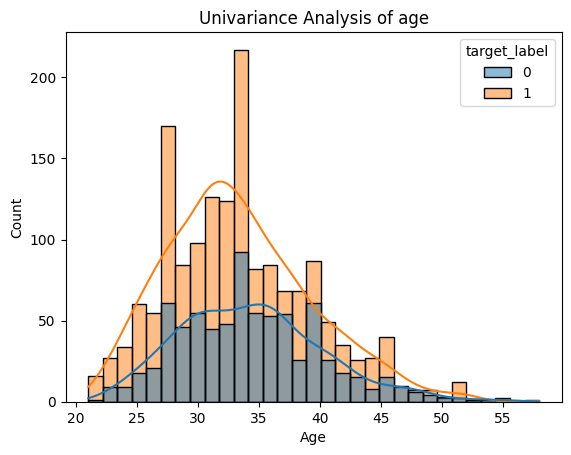

In [35]:
plt.title('Univariance Analysis of age')
sns.histplot(data=new_df,x='Age',kde=True,hue='target_label')
plt.show()

# Analysis from age distribution

1. Driver of age between 28 to 40 are contributing more in retention
2. Driver of age between 25 to 40 are contributing more in churn.

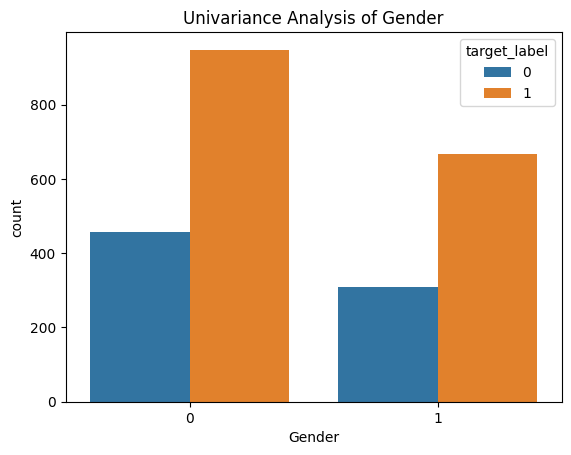

In [36]:
plt.title('Univariance Analysis of Gender')
sns.countplot(data=new_df,x='Gender',hue='target_label')
plt.show()

# Analysis of Gender distribution wrt to target

It is observed that churn rate for both male and female is high.

In [37]:
new_df.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Reporting_Date_year,Reporting_Date_month,Last_Working_Date_year,Last_Working_Date_month,Date_of_joining_year,Date_of_joining_month,target_label
0,28,0,2,57387,1,1,1715580,2,2019,3,2019,3,2018,3,1
1,31,0,2,67016,2,2,0,1,2020,12,2019,7,2020,7,0
2,43,0,2,65603,2,2,350000,1,2020,4,2020,4,2019,4,1
3,29,0,0,46368,1,1,120360,1,2019,3,2019,3,2019,3,1
4,31,1,1,78728,3,3,1265000,2,2020,12,2019,4,2020,4,0


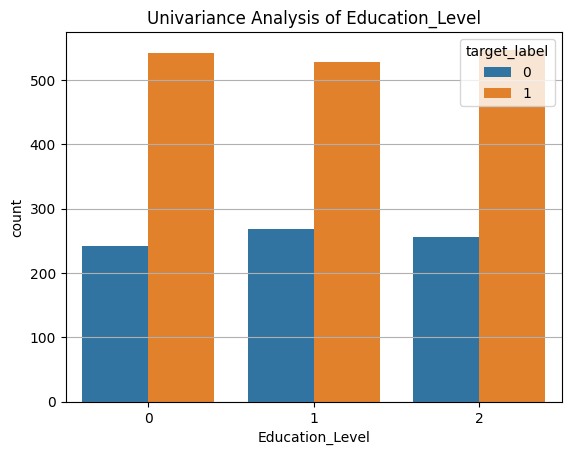

In [38]:
plt.title('Univariance Analysis of Education_Level')
plt.grid()
sns.countplot(data=new_df,x='Education_Level',hue='target_label')
plt.show()

1. According to observation 12+ education level population tend to retain in company.
2. According to observation 10+ & graduate education level population tend to leave company soon.

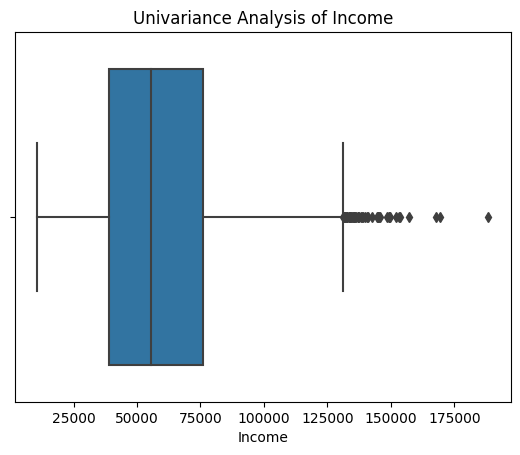

In [39]:
plt.title('Univariance Analysis of Income')
sns.boxplot(data=new_df,x='Income',hue='target_label')
plt.show()

In [40]:
income_val = new_df['Income']
Q1,Q3 = income_val.quantile(0.25),income_val.quantile(0.75)
IQR = Q3-Q1
left_wisker = Q1-(1.5*IQR)
right_wisker = Q3+(1.5*IQR)
median_to_impute = np.median(new_df[((new_df['Income'] >= left_wisker) | (new_df['Income'] <= right_wisker))]['Income'])
new_df.loc[((new_df['Income'] <= (left_wisker)) | (new_df['Income'] >=(right_wisker))), 'Income'] = median_to_impute

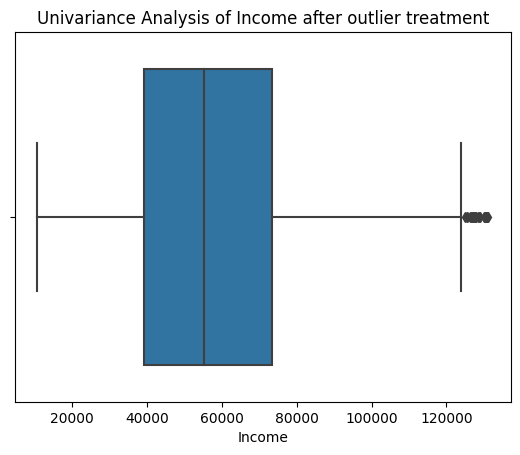

In [41]:
plt.title('Univariance Analysis of Income after outlier treatment')
sns.boxplot(data=new_df,x='Income')
plt.show()

In [42]:
new_df.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Reporting_Date_year,Reporting_Date_month,Last_Working_Date_year,Last_Working_Date_month,Date_of_joining_year,Date_of_joining_month,target_label
0,28,0,2,57387,1,1,1715580,2,2019,3,2019,3,2018,3,1
1,31,0,2,67016,2,2,0,1,2020,12,2019,7,2020,7,0
2,43,0,2,65603,2,2,350000,1,2020,4,2020,4,2019,4,1
3,29,0,0,46368,1,1,120360,1,2019,3,2019,3,2019,3,1
4,31,1,1,78728,3,3,1265000,2,2020,12,2019,4,2020,4,0


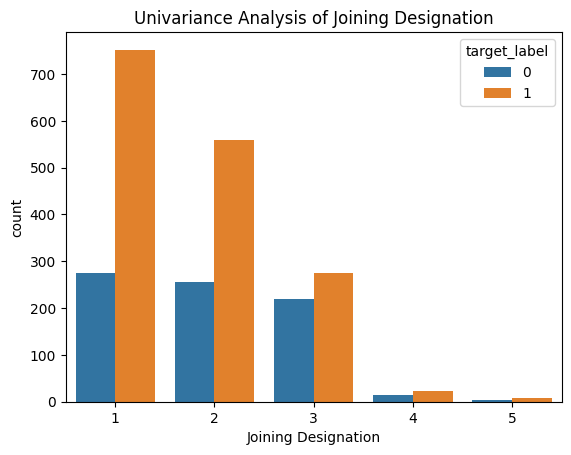

In [43]:
plt.title('Univariance Analysis of Joining Designation')
sns.countplot(data=new_df,x='Joining Designation',hue='target_label')
plt.show()

According to above observation drivers with joining designation 1,2,3 are more prone to leave organisation

as compare to joining designation with 4 & 5.

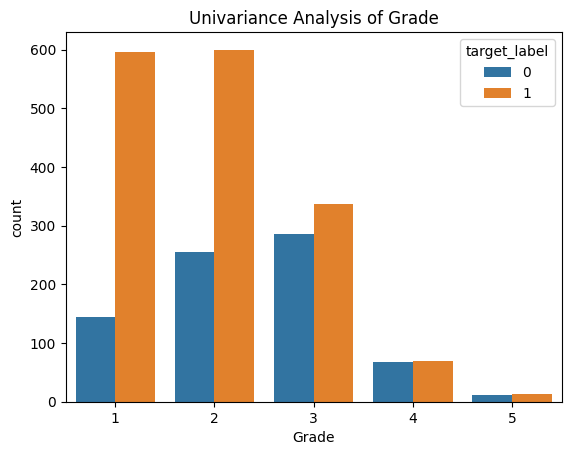

In [44]:
plt.title('Univariance Analysis of Grade')
sns.countplot(data=new_df,x='Grade',hue='target_label')
plt.show()

Drivers with grade 1 and 2 are more prone to leave organisation as compare to 3,4,5 grade drivers.

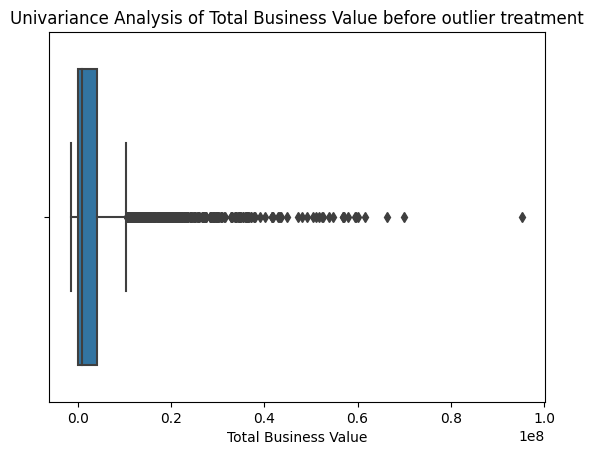

In [45]:
plt.title('Univariance Analysis of Total Business Value before outlier treatment')
sns.boxplot(data=new_df,x='Total Business Value')
plt.show()

In [46]:
income_val = new_df['Total Business Value']
Q1,Q3 = income_val.quantile(0.25),income_val.quantile(0.75)
IQR = Q3-Q1
left_wisker = Q1-(1.5*IQR)
right_wisker = Q3+(1.5*IQR)
median_to_impute = np.median(new_df[((new_df['Total Business Value'] >= left_wisker) | (new_df['Total Business Value'] <= right_wisker))]['Total Business Value'])
new_df.loc[((new_df['Total Business Value'] <= (left_wisker)) | (new_df['Total Business Value'] >=(right_wisker))), 'Total Business Value'] = median_to_impute

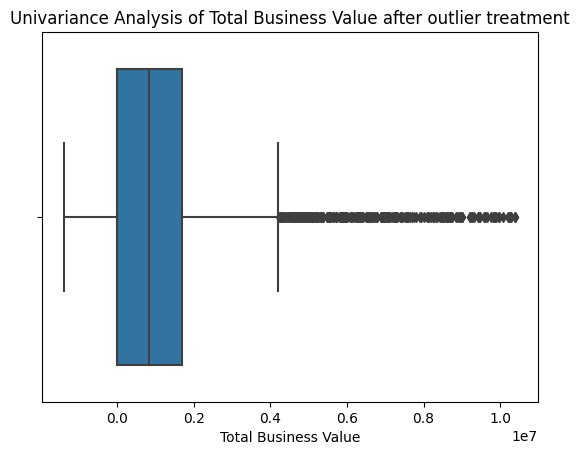

In [47]:
plt.title('Univariance Analysis of Total Business Value after outlier treatment')
sns.boxplot(data=new_df,x='Total Business Value')
plt.show()

C:\Users\gaura\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


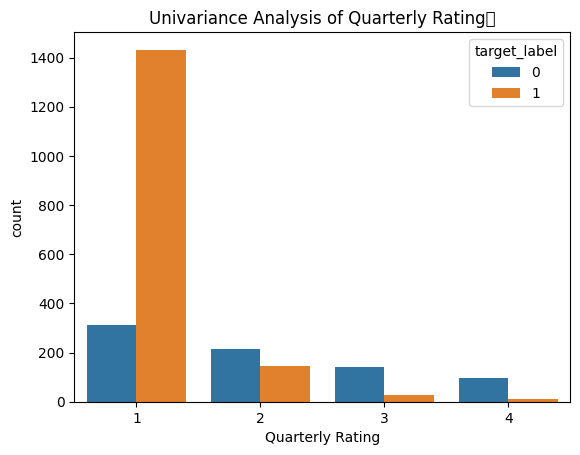

In [48]:
plt.title('Univariance Analysis of Quarterly Rating	')
sns.countplot(data=new_df,x='Quarterly Rating',hue='target_label')
plt.show()

Drivers with Quaterly rating as 1 has more probability of leaving organisation.

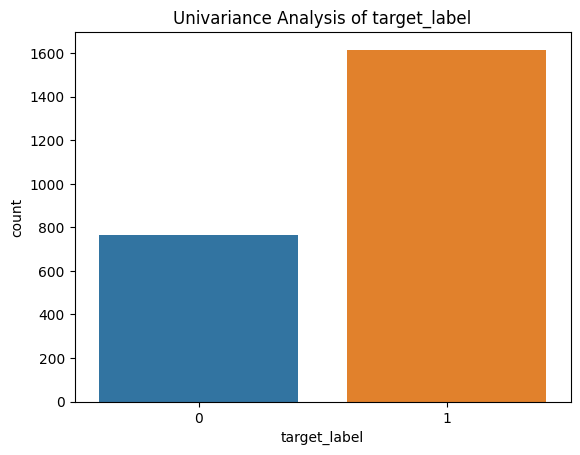

In [49]:
plt.title('Univariance Analysis of target_label')
sns.countplot(data=new_df,x='target_label')
plt.show()

In [50]:
new_df.shape

(2381, 15)

# Splitting data into train and test 

In [51]:
X = new_df.loc[:,'Age':'Date_of_joining_month']
Y = new_df['target_label']

In [52]:
from sklearn.model_selection import train_test_split as tts,KFold,cross_validate
from sklearn.ensemble import RandomForestClassifier

In [53]:
xtrain,xtest,ytrain,ytest = tts(X,Y,test_size=0.39,random_state=0)

In [54]:
print(f'xtrain_shape : {xtrain.shape} , xtest_shape : {xtest.shape} , ytrain_shape : {ytrain.shape} , ytest_shape : {ytest.shape}')

xtrain_shape : (1452, 14) , xtest_shape : (929, 14) , ytrain_shape : (1452,) , ytest_shape : (929,)


# Handling imbalance Class issue

In [55]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from collections import Counter

In [56]:
print(f'Counter before imbalance class handling : {Counter(ytrain)}')

Counter before imbalance class handling : Counter({1: 1013, 0: 439})


In [57]:
smotek = ADASYN(sampling_strategy='minority')

In [58]:
xtrain,ytrain = smotek.fit_resample(xtrain,ytrain)

In [59]:
print(f'Counter after imbalance class handling : {Counter(ytrain)}')

Counter after imbalance class handling : Counter({1: 1013, 0: 960})


# Train model without hyperparameters tuning

In [60]:
model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [61]:
y_pred = model.predict(xtest)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve,precision_recall_curve

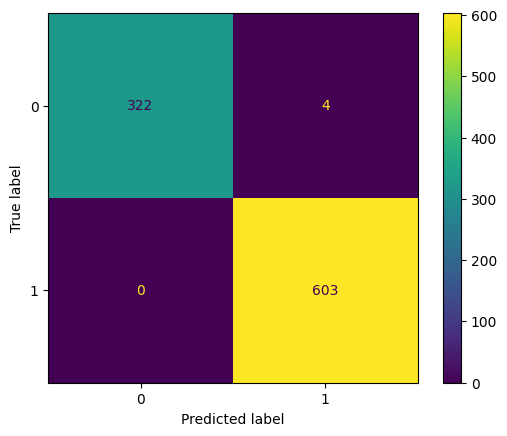

In [63]:
ConfusionMatrixDisplay(confusion_matrix(ytest,y_pred)).plot()
plt.show()

In [64]:
print(f'training accuracy : {model.score(xtrain,ytrain)}, testing accuracy : {model.score(xtest,ytest)}')

training accuracy : 1.0, testing accuracy : 0.9956942949407965


In [65]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       326
           1       0.99      1.00      1.00       603

    accuracy                           1.00       929
   macro avg       1.00      0.99      1.00       929
weighted avg       1.00      1.00      1.00       929



In [66]:
print(f'model AUC_ROC score : {roc_auc_score(ytest, model.predict_proba(xtest)[:,1])}')

model AUC_ROC score : 0.9981457741965021


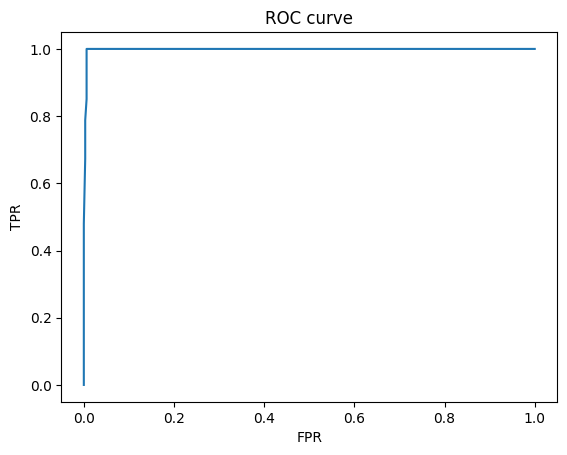

In [67]:
pred_prob=model.predict_proba(xtest)
fpr, tpr, thr = roc_curve(ytest, pred_prob[:,1])

plt.plot(fpr,tpr,'-')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

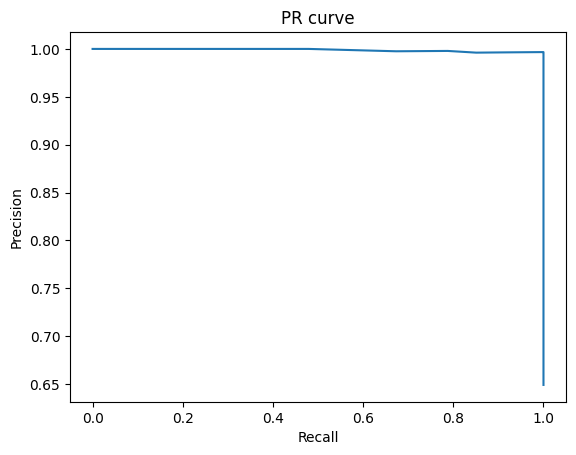

In [68]:
precision, recall, thr = precision_recall_curve(ytest, model.predict_proba(xtest)[:,1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

# Training model through boosting algorithm

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss = 'log_loss',verbose =1)

In [71]:
gbc.fit(xtrain,ytrain)

      Iter       Train Loss   Remaining Time 
         1           1.2110            0.32s
         2           1.0682            0.23s
         3           0.9493            0.31s
         4           0.8490            0.30s
         5           0.7635            0.27s
         6           0.6902            0.25s
         7           0.6268            0.21s
         8           0.5717            0.28s
         9           0.5236            0.28s
        10           0.4815            0.26s
        20           0.2518            0.21s
        30           0.1088            0.19s
        40           0.0656            0.18s
        50           0.0415            0.16s
        60           0.0272            0.14s
        70           0.0192            0.13s
        80           0.0129            0.12s
        90           0.0089            0.11s
       100           0.0064            0.09s


GradientBoostingClassifier(max_depth=2, n_estimators=150, verbose=1)

In [72]:
print(f'training accuracy : {gbc.score(xtrain,ytrain)}, testing accuracy : {gbc.score(xtest,ytest)}')

training accuracy : 1.0, testing accuracy : 0.9978471474703983


In [73]:
y_pred = gbc.predict(xtest)

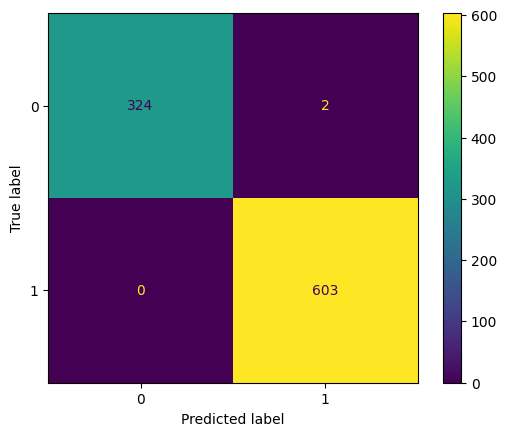

In [74]:
ConfusionMatrixDisplay(confusion_matrix(ytest,y_pred)).plot()
plt.show()

In [75]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       326
           1       1.00      1.00      1.00       603

    accuracy                           1.00       929
   macro avg       1.00      1.00      1.00       929
weighted avg       1.00      1.00      1.00       929



In [76]:
print(f'model AUC_ROC score : {roc_auc_score(ytest, gbc.predict_proba(xtest)[:,1])}')

model AUC_ROC score : 0.9990080273479229


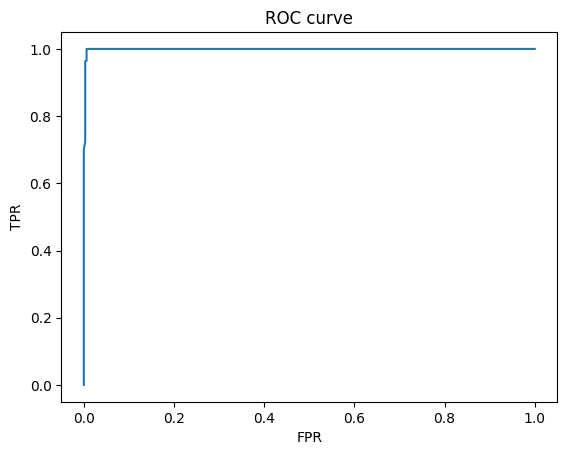

In [77]:
pred_prob=gbc.predict_proba(xtest)
fpr, tpr, thr = roc_curve(ytest, pred_prob[:,1])

plt.plot(fpr,tpr,'-')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

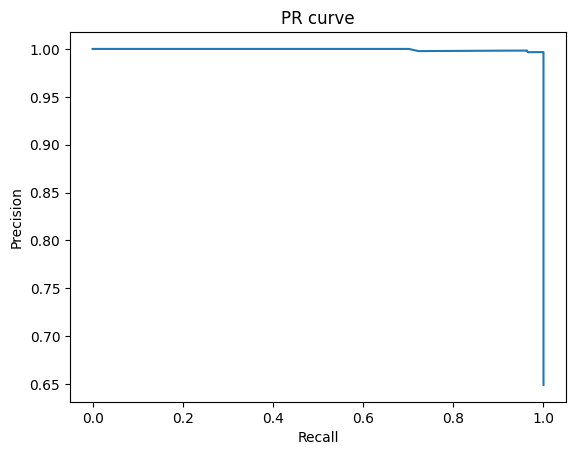

In [78]:
precision, recall, thr = precision_recall_curve(ytest, gbc.predict_proba(xtest)[:,1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

# Actionable Insights & Recommendations

1. Business should focus more on drivers whose joining designation is in range of 1,2,3 they are more prone to leave company.

2. Business should focus more on drivers whose grade is in range of 1,2,3 because they are more prone to leave company.

3. Business should focus more on drivers whose rating is 1 because they are more prone to leave company.
